In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import LinearRegression
from allison.regression.loss import mean_squared_error
from allison.metrics import r2_score
from allison.datasets import train_test_split

In [23]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,7.578846
1,2.018018,7.945669
2,2.036036,7.631138
3,2.054054,6.155741
4,2.072072,9.331933


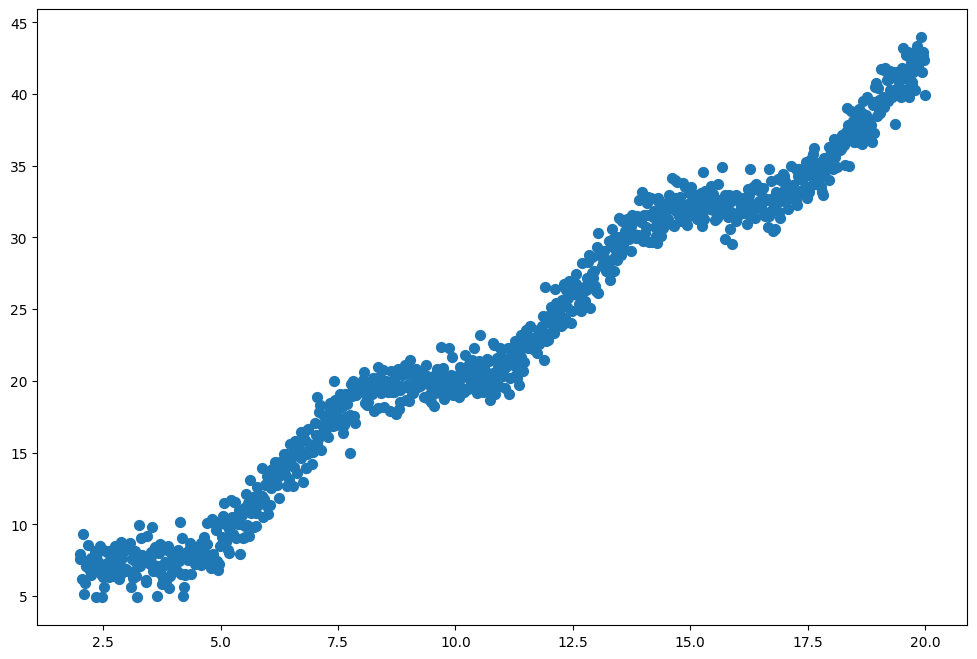

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [25]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [26]:
model=LinearRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 725.851% 	 r2_score: -542.57% 

Iter:	4	==================================================>	 mean_squared_error: 235.414% 	 r2_score: -108.40% 

Iter:	6	==================================================>	 mean_squared_error: 77.348% 	 r2_score: 31.53% 

Iter:	8	==================================================>	 mean_squared_error: 26.563% 	 r2_score: 76.49% 

Iter:	10	==================================================>	 mean_squared_error: 10.336% 	 r2_score: 90.85% 

Iter:	12	==================================================>	 mean_squared_error: 5.204% 	 r2_score: 95.39% 

Iter:	14	==================================================>	 mean_squared_error: 3.611% 	 r2_score: 96.80% 

Iter:	16	==================================================>	 mean_squared_error: 3.134% 	 r2_score: 97.23% 

Iter:	18	==================================================>	 mean_squared_error: 3.001% 	 r2_score: 97.34% 

Ite

In [27]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(725.8509474886351),
  np.float64(235.41367316173114),
  np.float64(77.34768308372807),
  np.float64(26.562515135588647),
  np.float64(10.33644839894041),
  np.float64(5.204149843012415),
  np.float64(3.610764420561836),
  np.float64(3.133514597448333),
  np.float64(3.0009080365683336),
  np.float64(2.970417132043802)],
 'precision': [np.float64(-5.425718073283538),
  np.float64(-1.0840392914925339),
  np.float64(0.31526657526957247),
  np.float64(0.7648508496556148),
  np.float64(0.9084948452289868),
  np.float64(0.9539293847889561),
  np.float64(0.9680350982858824),
  np.float64(0.9722600329290928),
  np.float64(0.9734339549000302),
  np.float64(0.9737038807807525)],
 'params': [{'bias': array([0.]), 'weights': array([-0.85131227])},
  {'bias': array([0.1137077]), 'weights': array([0.40403101])},
  {'bias': array([0.17839228]), 'weights': array([1.11815457])},
  {'bias': array([0.21518921]), 'weights': array([1.524396

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [29]:
r2_score =model.evaluate(X_test, y_test)
r2_score

np.float64(0.9708811210115252)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.97%)')

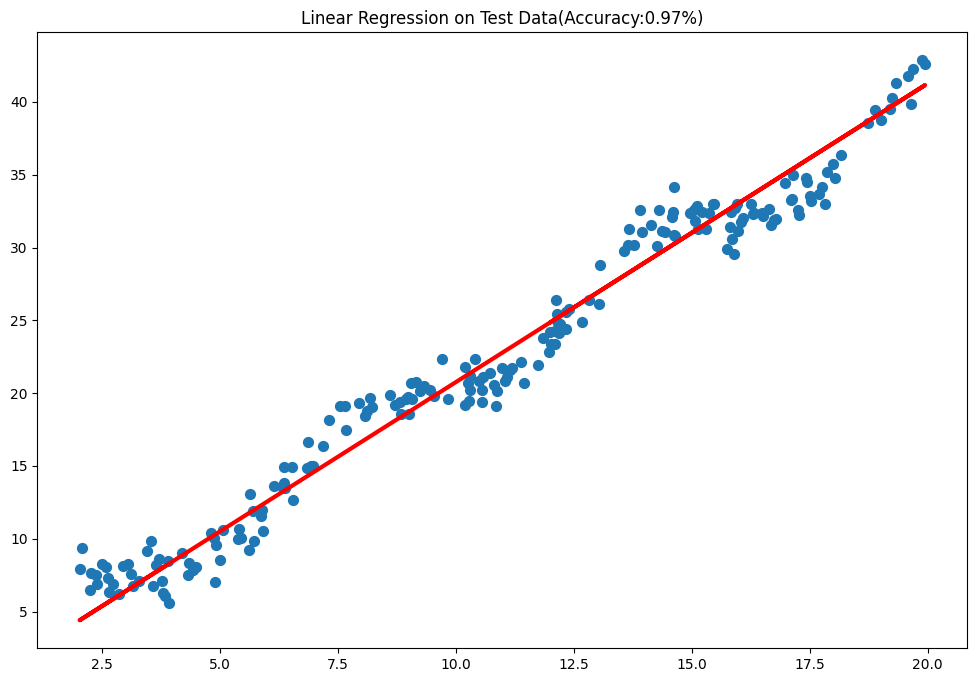

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')